In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (MinMaxScaler, Normalizer, StandardScaler,PolynomialFeatures, OneHotEncoder, LabelEncoder)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')
from sklearn.linear_model import Ridge, Lasso

In [2]:
filepath = '../Engineering Salary Prediction/Engineering_graduate_salary.csv'
data_v1 = pd.read_csv(filepath)

In [3]:
data_v2 = data_v1.copy()
others = data_v2["Specialization"].value_counts().index[7:]
label = 'Other'
data_v2["Specialization"] = data_v2["Specialization"].replace(others, label)
data_v3 = data_v2.drop(data_v2[(data_v2.GraduationYear ==0)].index)

In [4]:
bc_result_salary = boxcox(data_v3["Salary"])
box_cox_salary = bc_result_salary[0]
normaltest(box_cox_salary)

NormaltestResult(statistic=76.40077545521372, pvalue=2.5691082475172492e-17)

In [5]:
data_v4 = data_v3.copy()
data_v4["Salary"] = box_cox_salary

In [6]:
data_v5 = data_v4.drop(['ID', 'DOB', '10board', '12graduation', '12board', 'CollegeID', 'CollegeCityID','CollegeState', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg','CivilEngg'], axis = 'columns')

In [7]:
mask = data_v5.dtypes == np.object
categorical_cols = data_v5.columns[mask]
data_v6 = pd.get_dummies(data_v5, columns = categorical_cols)
data_v6 = data_v6.drop('Gender_f', axis =1)

In [8]:
data_v7 = data_v6.copy()

In [9]:
bc_result_GPA = boxcox(data_v7["collegeGPA"])
box_cox_GPA = bc_result_GPA[0]

In [10]:
normaltest(box_cox_GPA)

NormaltestResult(statistic=124.90866701075149, pvalue=7.5236327400927065e-28)

In [11]:
data_v7["collegeGPA"] = box_cox_GPA

In [12]:
scaler_GPA = MinMaxScaler()
GPA_array = data_v7["collegeGPA"].values
scaler_GPA.fit(GPA_array.reshape(-1,1))
scaler_GPA_sc = scaler_GPA.transform(GPA_array.reshape(-1,1))
data_v7["collegeGPA"] = scaler_GPA_sc

In [13]:
normaltest(data_v6["collegeGPA"])

NormaltestResult(statistic=1041.6876101835417, pvalue=6.315525821894445e-227)

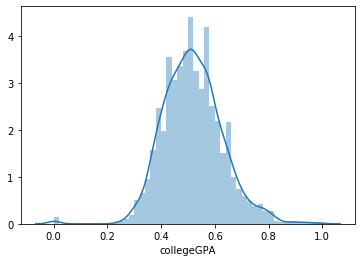

In [14]:
sns.distplot(data_v7["collegeGPA"])

In [15]:
bc_result_10p = boxcox(data_v7["10percentage"])
box_cox_10p = bc_result_10p[0]

In [16]:
normaltest(box_cox_10p)

NormaltestResult(statistic=175.97460591432204, pvalue=6.131967553203854e-39)

In [17]:
normaltest(data_v6["10percentage"])

NormaltestResult(statistic=146.29185545475372, pvalue=1.7105162891640768e-32)

In [18]:
# We will not proceed with this transformation as it will reduce our p-value
# data_v7["10percentage"] = box_cox_10p

In [19]:
scaler_10p = MinMaxScaler()
tenp_array = data_v7["10percentage"].values
scaler_10p.fit(tenp_array.reshape(-1,1))
scaler_10p_sc = scaler_10p.transform(tenp_array.reshape(-1,1))
data_v7["10percentage"] = scaler_10p_sc

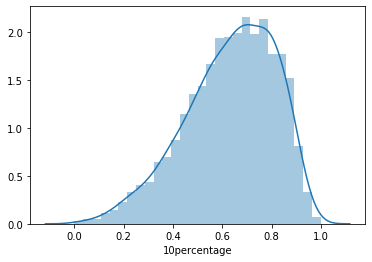

In [20]:
sns.distplot(data_v7["10percentage"])

In [21]:
bc_result_12p = boxcox(data_v7["12percentage"])
box_cox_12p = bc_result_12p[0]
normaltest(box_cox_12p)

NormaltestResult(statistic=113.22242027259647, pvalue=2.594560630871285e-25)

In [22]:
normaltest(data_v6["12percentage"])

NormaltestResult(statistic=114.81459344978309, pvalue=1.1703824783487635e-25)

In [23]:
data_v7["12percentage"] = box_cox_12p

In [24]:
scaler_12p = MinMaxScaler()
twelvep_array = data_v7["12percentage"].values
scaler_12p.fit(twelvep_array.reshape(-1,1))
scaler_12p_sc = scaler_12p.transform(twelvep_array.reshape(-1,1))
data_v7["12percentage"] = scaler_12p_sc

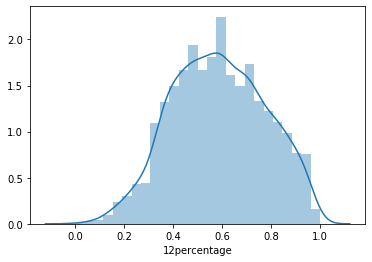

In [25]:
sns.distplot(data_v7["12percentage"])

In [26]:
scaler_cons = MinMaxScaler()
consp_array = data_v7["conscientiousness"].values
scaler_cons.fit(consp_array.reshape(-1,1))
scaler_cons_sc = scaler_cons.transform(consp_array.reshape(-1,1))

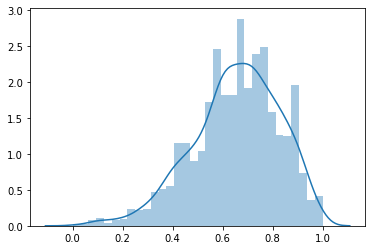

In [27]:
sns.distplot(scaler_cons_sc)

In [28]:
data_v7["conscientiousness"].describe()

count    2997.000000
mean       -0.039105
std         1.024921
min        -3.893300
25%        -0.649100
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64

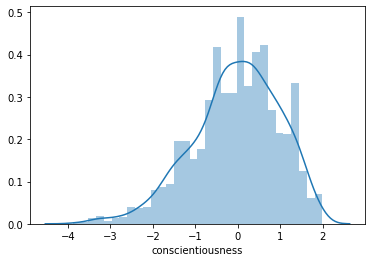

In [29]:
sns.distplot(data_v7["conscientiousness"])

In [30]:
data_v7["conscientiousness"] = scaler_cons_sc + 1

In [31]:
data_v7["conscientiousness"].describe()

count    2997.000000
mean        1.654518
std         0.174052
min         1.000000
25%         1.550929
50%         1.669038
75%         1.780491
max         2.000000
Name: conscientiousness, dtype: float64

In [32]:
bc_result_cons = boxcox(data_v7["conscientiousness"])

In [33]:
box_cox_cons = bc_result_cons[0]
normaltest(box_cox_cons)

NormaltestResult(statistic=48.053786782256104, pvalue=3.674961409548183e-11)

In [34]:
normaltest(data_v7["conscientiousness"])

NormaltestResult(statistic=120.55516754022851, pvalue=6.634038478639149e-27)

In [35]:
data_v7["conscientiousness"] = box_cox_cons

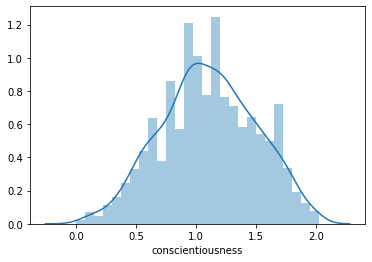

In [36]:
sns.distplot(data_v7["conscientiousness"])

In [37]:
scaler_cons2 = MinMaxScaler()
cons2p_array = data_v7["conscientiousness"].values
scaler_cons2.fit(cons2p_array.reshape(-1,1))
scaler_cons2_sc = scaler_cons2.transform(cons2p_array.reshape(-1,1))

In [38]:
data_v7["conscientiousness"] = scaler_cons2_sc

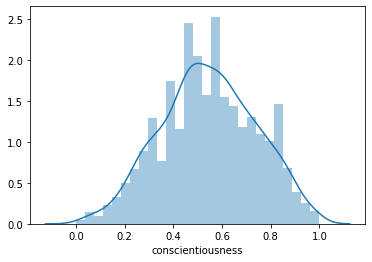

In [39]:
sns.distplot(data_v7["conscientiousness"])

In [40]:
normaltest(data_v6["conscientiousness"])

NormaltestResult(statistic=120.55516754022867, pvalue=6.634038478638668e-27)

In [41]:
scaler_agrea = MinMaxScaler()
agreap_array = data_v7["agreeableness"].values
scaler_agrea.fit(agreap_array.reshape(-1,1))
scaler_agrea_sc = scaler_agrea.transform(agreap_array.reshape(-1,1))

In [42]:
data_v7["agreeableness"] = scaler_agrea_sc + 1

In [43]:
bc_result_agrea = boxcox(data_v7["agreeableness"])
box_cox_agrea = bc_result_agrea[0]
normaltest(box_cox_agrea)

NormaltestResult(statistic=11.221833345248623, pvalue=0.003657714893382781)

In [44]:
normaltest(data_v7["agreeableness"])

NormaltestResult(statistic=756.6386723535769, pvalue=4.98884373873633e-165)

In [45]:
data_v7["agreeableness"] = box_cox_agrea

In [46]:
scaler_agrea2 = MinMaxScaler()
agrea2p_array = data_v7["agreeableness"].values
scaler_agrea2.fit(agrea2p_array.reshape(-1,1))
scaler_agrea2_sc = scaler_agrea2.transform(agrea2p_array.reshape(-1,1))

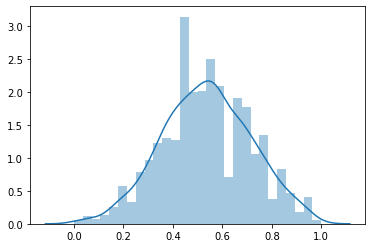

In [47]:
sns.distplot(scaler_agrea2_sc)

In [48]:
data_v7["agreeableness"] = scaler_agrea2_sc

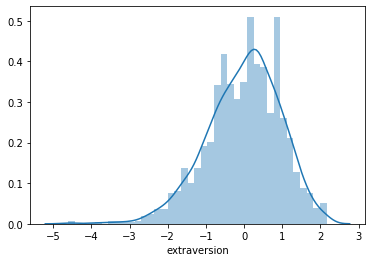

In [49]:
sns.distplot(data_v7["extraversion"])

In [50]:
scaler_extra = MinMaxScaler()
extrap_array = data_v7["extraversion"].values
scaler_extra.fit(extrap_array.reshape(-1,1))
scaler_extra_sc = scaler_extra.transform(extrap_array.reshape(-1,1))

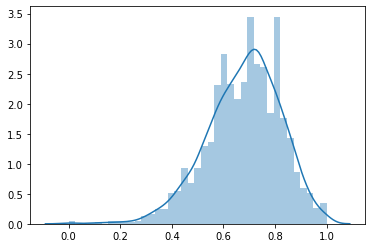

In [51]:
sns.distplot(scaler_extra_sc)

In [52]:
data_v7["extraversion"] = scaler_extra_sc + 1

In [53]:
bc_result_extra = boxcox(data_v7["extraversion"])
box_cox_extra = bc_result_extra[0]
normaltest(box_cox_extra)

NormaltestResult(statistic=4.491540298908693, pvalue=0.10584599174247404)

In [54]:
normaltest(data_v7["extraversion"])

NormaltestResult(statistic=148.8764925328704, pvalue=4.697647269228583e-33)

In [55]:
data_v7["extraversion"] = box_cox_extra

In [56]:
scaler_extra2 = MinMaxScaler()
extra2p_array = data_v7["extraversion"].values
scaler_extra2.fit(extra2p_array.reshape(-1,1))
scaler_extra2_sc = scaler_extra2.transform(extra2p_array.reshape(-1,1))

In [57]:
data_v7["extraversion"] = scaler_extra2_sc

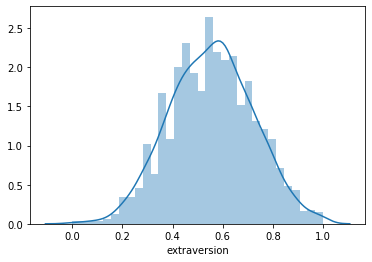

In [58]:
sns.distplot(data_v7["extraversion"])

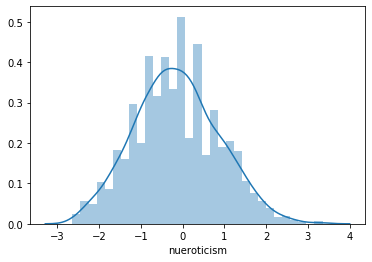

In [59]:
sns.distplot(data_v7["nueroticism"])

In [60]:
normaltest(data_v7["nueroticism"])

NormaltestResult(statistic=19.12907781316011, pvalue=7.017356347184154e-05)

In [61]:
scaler_neuro = MinMaxScaler()
neurop_array = data_v7["nueroticism"].values
scaler_neuro.fit(neurop_array.reshape(-1,1))
scaler_neuro_sc = scaler_neuro.transform(neurop_array.reshape(-1,1))

In [62]:
data_v7["nueroticism"] = scaler_neuro_sc + 1

In [63]:
bc_result_neuro = boxcox(data_v7["nueroticism"])
box_cox_neuro = bc_result_neuro[0]
normaltest(box_cox_neuro)

NormaltestResult(statistic=8.900219446756301, pvalue=0.011677285628873341)

In [64]:
data_v7["nueroticism"] = box_cox_neuro

In [65]:
scaler_neuro2 = MinMaxScaler()
neuro2p_array = data_v7["nueroticism"].values
scaler_neuro2.fit(neuro2p_array.reshape(-1,1))
scaler_neuro2_sc = scaler_neuro2.transform(neuro2p_array.reshape(-1,1))

In [66]:
data_v7["nueroticism"] = scaler_neuro2_sc

In [67]:
normaltest(data_v7["nueroticism"])

NormaltestResult(statistic=8.900219446756422, pvalue=0.011677285628872637)

In [68]:
normaltest(data_v7["openess_to_experience"])

NormaltestResult(statistic=1048.4587194042647, pvalue=2.1383649618919804e-228)

In [69]:
scaler_oe = MinMaxScaler()
oep_array = data_v7["openess_to_experience"].values
scaler_oe.fit(oep_array.reshape(-1,1))
scaler_oe_sc = scaler_oe.transform(oep_array.reshape(-1,1))

In [70]:
data_v7["openess_to_experience"] = scaler_oe_sc + 1

In [71]:
bc_result_oe = boxcox(data_v7["openess_to_experience"])
box_cox_oe = bc_result_oe[0]
normaltest(box_cox_oe)

NormaltestResult(statistic=2.2188453602061022, pvalue=0.32974927695192086)

In [72]:
data_v7["openess_to_experience"] = box_cox_oe

In [73]:
scaler_oe2 = MinMaxScaler()
oe2p_array = data_v7["openess_to_experience"].values
scaler_oe2.fit(oe2p_array.reshape(-1,1))
scaler_oe2_sc = scaler_oe2.transform(oep_array.reshape(-1,1))

In [74]:
data_v7["openess_to_experience"] = scaler_oe2_sc

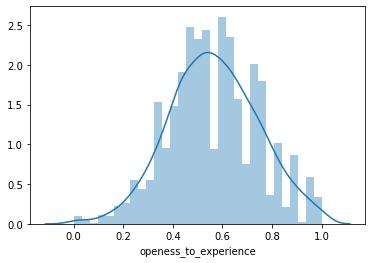

In [75]:
sns.distplot(data_v7["openess_to_experience"])

In [76]:
normaltest(data_v7["GraduationYear"])

NormaltestResult(statistic=82.69336557790102, pvalue=1.1050039227266835e-18)

In [77]:
scaler_gy = MinMaxScaler()
gyp_array = data_v7["GraduationYear"].values
scaler_gy.fit(gyp_array.reshape(-1,1))
scaler_gy_sc = scaler_gy.transform(gyp_array.reshape(-1,1))

In [78]:
data_v7["GraduationYear"] = scaler_gy_sc + 1

In [79]:
bc_result_gy = boxcox(data_v7["GraduationYear"])
box_cox_gy = bc_result_gy[0]
normaltest(box_cox_gy)

NormaltestResult(statistic=0.44604044322224184, pvalue=0.8000986698468074)

In [80]:
data_v7["GraduationYear"] = box_cox_gy

In [81]:
scaler_gy2 = MinMaxScaler()
gy2p_array = data_v7["GraduationYear"].values
scaler_gy2.fit(gy2p_array.reshape(-1,1))
scaler_gy2_sc = scaler_gy2.transform(gy2p_array.reshape(-1,1))

In [82]:
data_v7["GraduationYear"] = scaler_gy2_sc

In [83]:
normaltest(data_v7["GraduationYear"])

NormaltestResult(statistic=0.44604044322225966, pvalue=0.8000986698468003)

In [84]:
normaltest(data_v7["English"])

NormaltestResult(statistic=25.866423517437397, pvalue=2.4164482559007315e-06)

In [85]:
scaler_en = MinMaxScaler()
enp_array = data_v7["English"].values
scaler_en.fit(enp_array.reshape(-1,1))
scaler_en_sc = scaler_en.transform(enp_array.reshape(-1,1))

In [86]:
data_v7["English"] = scaler_en_sc + 1

In [87]:
bc_result_en = boxcox(data_v7["English"])
box_cox_en = bc_result_en[0]
normaltest(box_cox_en)

NormaltestResult(statistic=13.121886396157839, pvalue=0.0014145508792688462)

In [88]:
data_v7["English"] = box_cox_en

In [89]:
scaler_en2 = MinMaxScaler()
en2p_array = data_v7["English"].values
scaler_en2.fit(en2p_array.reshape(-1,1))
scaler_en2_sc = scaler_en2.transform(en2p_array.reshape(-1,1))

In [90]:
data_v7["English"] = scaler_en2_sc

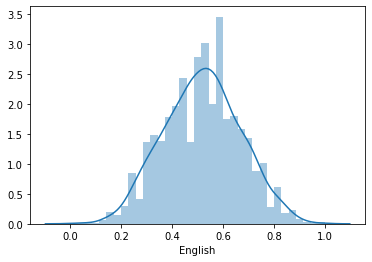

In [91]:
sns.distplot(data_v7["English"])

In [92]:
normaltest(data_v7["Logical"])

NormaltestResult(statistic=31.680582367986048, pvalue=1.32022802377721e-07)

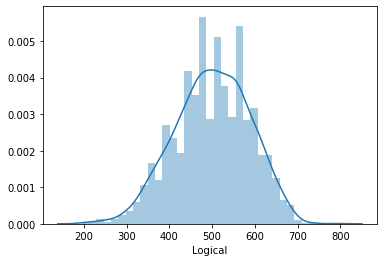

In [93]:
sns.distplot(data_v7["Logical"])

In [94]:
scaler_lg = MinMaxScaler()
lgp_array = data_v7["Logical"].values
scaler_lg.fit(lgp_array.reshape(-1,1))
scaler_lg_sc = scaler_lg.transform(lgp_array.reshape(-1,1))

In [95]:
data_v7["Logical"] = scaler_lg_sc + 1

In [96]:
bc_result_lg = boxcox(data_v7["Logical"])
box_cox_lg = bc_result_lg[0]
normaltest(box_cox_lg)

NormaltestResult(statistic=23.131502159924707, pvalue=9.48545410159262e-06)

In [97]:
data_v7["Logical"] = box_cox_lg

In [98]:
scaler_lg2 = MinMaxScaler()
lg2p_array = data_v7["Logical"].values
scaler_lg2.fit(lg2p_array.reshape(-1,1))
scaler_lg2_sc = scaler_lg2.transform(lg2p_array.reshape(-1,1))

In [99]:
data_v7["Logical"] = scaler_lg2_sc

In [100]:
normaltest(data_v7["Logical"])

NormaltestResult(statistic=23.131502159924693, pvalue=9.485454101592676e-06)

In [101]:
normaltest(data_v7["Quant"])

NormaltestResult(statistic=1.1442353011945232, pvalue=0.564329120555493)

In [102]:
bc_result_qt = boxcox(data_v7["Quant"])
box_cox_qt = bc_result_qt[0]
normaltest(box_cox_qt)

NormaltestResult(statistic=0.3842835623840151, pvalue=0.8251898637948244)

In [103]:
data_v7["Quant"] = box_cox_qt

In [104]:
scaler_qt = MinMaxScaler()
qtp_array = data_v7["Quant"].values
scaler_qt.fit(qtp_array.reshape(-1,1))
scaler_qt_sc = scaler_qt.transform(qtp_array.reshape(-1,1))

In [105]:
data_v7["Quant"] = scaler_qt_sc

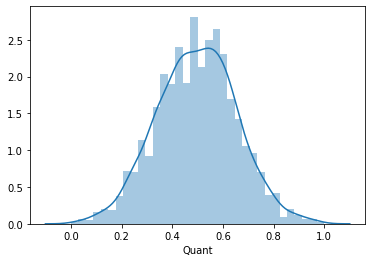

In [106]:
sns.distplot(data_v7["Quant"])

In [107]:
col = data_v7.CollegeTier.values

In [108]:
data_v7["CollegeTier"] = col - 1

In [109]:
data_v7.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,conscientiousness,...,Degree_M.Tech./M.E.,Degree_MCA,Specialization_Other,Specialization_computer application,Specialization_computer engineering,Specialization_computer science & engineering,Specialization_electronics and communication engineering,Specialization_electronics and electrical engineering,Specialization_information technology,Specialization_mechanical engineering
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,...,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,0.632989,0.586430,0.924591,0.518326,0.296296,0.427726,0.518044,0.448121,0.496235,0.544651,...,0.013347,0.066733,0.115449,0.067067,0.138472,0.185853,0.223557,0.049383,0.168836,0.051385
std,0.182657,0.189164,0.264094,0.110527,0.456699,0.133985,0.150653,0.145449,0.157288,0.194676,...,0.114773,0.249601,0.319616,0.250180,0.345452,0.389053,0.416698,0.216702,0.374669,0.220818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.513696,0.444731,1.000000,0.442571,0.000000,0.355855,0.411839,0.343778,0.387364,0.413562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.656136,0.580925,1.000000,0.515932,0.000000,0.459233,0.522220,0.450279,0.496529,0.543896,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.777940,0.727065,1.000000,0.582825,1.000000,0.574755,0.620069,0.554108,0.600038,0.682075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here we will start ou Prediction :

In [110]:
s = StandardScaler()
lr = LinearRegression()
ls = Lasso(alpha=0.0001)
rg = Ridge(alpha=0.001)

In [111]:
y_col = "Salary"

X = data_v7.drop(y_col, axis=1)
y = data_v7[y_col]

pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)
X_pf_df = pd.DataFrame(X_pf)

names = PolynomialFeatureNames(interaction.get_feature_names(),input_df)

print(pd.DataFrame(X_inter, columns= names))

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)

In [113]:
X_train

,10percentage,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,Quant,conscientiousness,...,Degree_M.Tech./M.E.,Degree_MCA,Specialization_Other,Specialization_computer application,Specialization_computer engineering,Specialization_computer science & engineering,Specialization_electronics and communication engineering,Specialization_electronics and electrical engineering,Specialization_information technology,Specialization_mechanical engineering
2674,0.730460,0.614935,1,0.422479,0,0.574755,0.585659,0.258587,0.438623,0.374289,...,0,0,0,0,1,0,0,0,0,0
1082,0.710373,0.840744,1,0.766761,1,0.355855,0.441876,0.484304,0.317245,0.673638,...,0,0,0,0,0,0,0,1,0,0
1264,0.730460,0.806825,1,0.514059,0,0.264027,0.598113,0.467218,0.769580,0.483954,...,0,0,0,0,0,0,0,1,0,0
1874,0.624543,0.554727,1,0.384172,1,0.264027,0.365910,0.228742,0.228697,0.639932,...,0,0,1,0,0,0,0,0,0,0
81,0.783784,0.680703,1,0.505459,1,0.264027,0.515048,0.554108,0.418094,0.543896,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,0.862673,0.708388,1,0.673327,0,0.355855,0.486099,0.304491,0.419377,0.607094,...,1,0,0,0,0,0,1,0,0,0
1990,0.678050,0.686308,1,0.421304,0,0.459233,0.620069,0.691238,0.691139,0.240712,...,0,0,1,0,0,0,0,0,0,0
1067,0.602630,0.631935,1,0.609143,0,0.459233,0.713477,0.536439,0.535264,0.650545,...,1,0,0,0,0,1,0,0,0,0
1035,0.474799,0.353671,0,0.581295,0,0.355855,0.680596,0.518915,0.613024,0.619747,...,0,1,0,1,0,0,0,0,0,0


In [114]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_train_pf = pf.fit_transform(X_train)
#X_train_df = pd.DataFrame(X_train_pf)

In [122]:
col_pf = pf.get_feature_names(X_train.columns)

In [145]:
type(col_pf_df)

pandas.core.frame.DataFrame

In [123]:
lr.fit(X_train_pf,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
X_test_pf = pf.fit_transform(X_test)
y_pred = lr.predict(X_test_pf)

In [125]:
r2_score(y_pred,y_test)

-0.001112349178703953

In [126]:
y_pred_df = pd.DataFrame(y_pred)

In [128]:
pd.DataFrame(y_pred).describe()

,0
count,9.000000e+02
mean,8.070190e+05
std,2.421003e+07
min,1.443489e+01
25%,1.760091e+01
50%,1.802919e+01
75%,1.849717e+01
max,7.263009e+08


In [176]:
lr_corf_pf = pd.DataFrame(list(zip(col_pf, lr.coef_.tolist())), columns =['Column_Name', 'Coefficient'])

In [177]:
lr_corf_pf

,Column_Name,Coefficient
0,10percentage,-2.048183e+09
1,12percentage,-1.247745e+09
2,CollegeTier,3.907552e+08
3,collegeGPA,9.638189e+09
4,CollegeCityTier,5.520716e+08
...,...,...
400,Specialization_electronics and electrical engi...,0.000000e+00
401,Specialization_electronics and electrical engi...,0.000000e+00
402,Specialization_information technology^2,-3.647964e+08
403,Specialization_information technology Speciali...,0.000000e+00


In [183]:
col_zero_impact = lr_corf_pf.where(lr_corf_pf["Coefficient"] == 0).dropna()

In [184]:
col_with_impact = lr_corf_pf.where(lr_corf_pf["Coefficient"] != 0).dropna()

In [192]:
col_with_impact.sort_values(by = "Coefficient", ascending=True).head(50)

,Column_Name,Coefficient
173,GraduationYear Specialization_mechanical engin...,-9.218020e+10
172,GraduationYear Specialization_information tech...,-9.218020e+10
171,GraduationYear Specialization_electronics and ...,-9.218020e+10
170,GraduationYear Specialization_electronics and ...,-9.218020e+10
168,GraduationYear Specialization_computer enginee...,-9.218020e+10
166,GraduationYear Specialization_Other,-9.218020e+10
169,GraduationYear Specialization_computer science...,-9.218020e+10
165,GraduationYear Degree_MCA,-4.589623e+10
167,GraduationYear Specialization_computer applica...,-4.577445e+10
13,openess_to_experience,-4.526423e+10


In [198]:
print(col_with_impact.loc[col_with_impact['Column_Name'] == "12percentage"])

    Column_Name   Coefficient
1  12percentage -1.247745e+09


SyntaxError: keyword can't be an expression (<ipython-input-190-0380880784d8>, line 1)

In [182]:
col_with_impact

,Column_Name,Coefficient
0,GraduationYear,-2.048183e+09
1,GraduationYear,-1.247745e+09
2,GraduationYear,3.907552e+08
3,GraduationYear,9.638189e+09
4,GraduationYear,5.520716e+08
...,...,...
390,GraduationYear,-1.894640e+08
395,GraduationYear,1.809031e+09
399,GraduationYear,-1.057647e+09
402,GraduationYear,-3.647964e+08


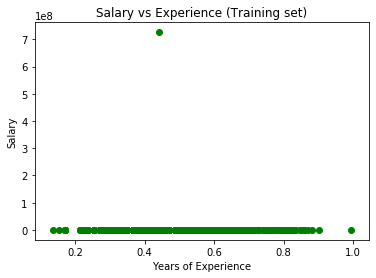

In [129]:
#plt.scatter(X_test.English, y_test, color = "red")
plt.scatter(X_test.English, y_pred, color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [127]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [128]:
alphas = np.geomspace(1e-20, 1e2, num=30)
alphas

array([1.00000000e-20, 5.73615251e-20, 3.29034456e-19, 1.88739182e-18,
       1.08263673e-17, 6.21016942e-17, 3.56224789e-16, 2.04335972e-15,
       1.17210230e-14, 6.72335754e-14, 3.85662042e-13, 2.21221629e-12,
       1.26896100e-11, 7.27895384e-11, 4.17531894e-10, 2.39502662e-09,
       1.37382380e-08, 7.88046282e-08, 4.52035366e-07, 2.59294380e-06,
       1.48735211e-05, 8.53167852e-05, 4.89390092e-04, 2.80721620e-03,
       1.61026203e-02, 9.23670857e-02, 5.29831691e-01, 3.03919538e+00,
       1.74332882e+01, 1.00000000e+02])

In [137]:
scores_rg=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    y_pred_rg = cross_val_predict(ridge, X_pf, y, cv = kf)
    score = r2_score(y, y_pred_rg)
    scores_rg.append(score)

In [138]:
scores_rg

[-1346849360.7457623,
 -40934453.22578275,
 -1244264.2861179044,
 -37848.034255197315,
 -1155.8647000691442,
 -36.041930980664866,
 -1.1931404844452103,
 0.008096526582538566,
 0.06937964086395243,
 0.07556128202376411,
 0.07650212013806235,
 0.07589169289570152,
 0.07661343112758723,
 0.0766855796898005,
 0.07669426746444963,
 0.07669514757254292,
 0.07669563009111724,
 0.07669603751490772,
 0.07669829093143599,
 0.07671115384264937,
 0.07678486115208516,
 0.077205350159684,
 0.07954377132820911,
 0.09090710993469708,
 0.12344581426077128,
 0.1634712961509478,
 0.20664887970430923,
 0.237249775396984,
 0.24661711936957642,
 0.24222184730189178]

In [139]:
rg_1 = Ridge(alpha=2.04335972e-15)
y_pred_rg = cross_val_predict(rg_1, X_pf, y, cv = kf)
r2_score(y, y_pred_rg)

0.008096526688315953

In [142]:
rg_1.get_params()

{'alpha': 2.04335972e-15,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

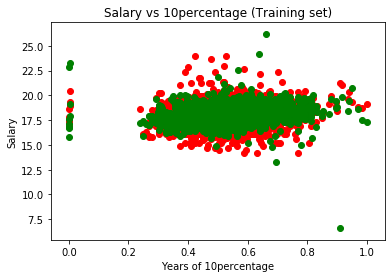

In [140]:
plt.scatter(X["collegeGPA"], y, color = "red")
plt.scatter(X["collegeGPA"], y_pred_rg, color = "green")
plt.title("Salary vs 10percentage (Training set)")
plt.xlabel("Years of 10percentage")
plt.ylabel("Salary")
plt.show()

In [ ]:
scores_ls=[]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=100000)
    y_pred_rg = cross_val_predict(lasso, X_pf, y, cv = kf)
    score = r2_score(y, y_pred_rg)
    scores_ls.append(score)

In [ ]:
scores_rg

SyntaxError: invalid syntax (<ipython-input-143-07877be230ca>, line 1)

In [20]:
print(list(zip(lr.coef_, model_1_features)))

In [17]:
lr.fit(X_train_pf_s, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
X_test_pf_s = s.transform(X_test_pf)

In [19]:
y_pred = lr.predict(X_test_pf_s)

In [63]:
r2_score

-0.0002927365541733895

In [53]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()

,linear regression
0,-4.250657e+09
1,-4.006730e+09
2,-3.608320e+09
3,-3.012121e+09
4,-2.814919e+09
...,...
4054,2.296648e+09
4055,2.344451e+09
4056,2.471911e+09
4057,2.499093e+09


In [52]:
ax.scatter(X_train_pf_s_df.iloc[:, 0], y_pred, edgecolor='a', facecolor='blue', alpha=0.7, label='Predictions data')

ValueError: x and y must be the same size

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

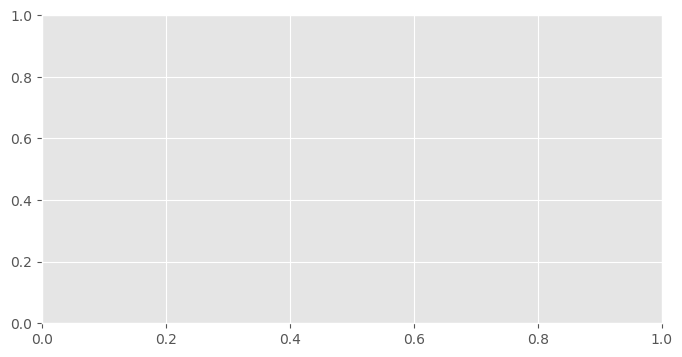

In [41]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(X_train_pf_s["collegeGPA"], y_pred, edgecolor='a', facecolor='blue', alpha=0.7, label='Predictions data')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Salary', fontsize=14)
ax.set_xlabel('collegeGPA', fontsize=14)
ax.text(0.8, 0.1, 'Yassine Mesbahi', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2_score, fontsize=18)

fig.tight_layout()

In [23]:
plt.plot(X_train_pf_s, y_train, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

None


In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [20]:
alphas = np.geomspace(1e-9, 1e2, num=10)
alphas

array([1.00000000e-09, 1.66810054e-08, 2.78255940e-07, 4.64158883e-06,
       7.74263683e-05, 1.29154967e-03, 2.15443469e-02, 3.59381366e-01,
       5.99484250e+00, 1.00000000e+02])

In [26]:
scores_rg=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("ridge_regression", rg)])

    predictions = cross_val_predict(estimator, X_pf, y, cv = kf)
    score = r2_score(y, predictions)
    scores_rg.append(score)

0       3.695716
1      -1.678127
2       2.367539
3      -0.681874
4      -2.288807
          ...   
2993   -4.507318
2994   -1.073647
2995    2.519174
2996    1.100364
2997    0.444745
Name: Salary, Length: 2997, dtype: float64

In [1]:
conda install nbconvert

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (<ipython-input-2-d1368364fc16>, line 1)